# 歷年生育數與平均每人所得關係分析

資料來源: 中華民國統計資訊網、中華民國內政部戶政司全球資訊網- 人口統計資料

https://www.stat.gov.tw/public/data/dgbas03/bs4/Statistical%20Tables/table(029).xls

https://www.ris.gov.tw/app/portal/346

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')

In [2]:
birth=pd.read_excel('birth.xls')
birth


,年度,西元年,出生數,男,女,出生嬰兒性比例,粗出生率(%)
0,民國47年,1958,413679,…,…,NaN,41.700000
1,民國48年,1959,423863,…,…,NaN,41.200000
2,民國49年,1960,422319,…,…,NaN,39.590000
3,民國50年,1961,422740,…,…,NaN,38.330000
4,民國51年,1962,426325,…,…,NaN,37.420000
5,民國52年,1963,427212,…,…,NaN,36.320000
6,民國53年,1964,419797,…,…,NaN,34.590000
7,民國54年,1965,409620,…,…,NaN,32.740000
8,民國55年,1966,418327,…,…,NaN,32.470000
9,民國56年,1967,376806,…,…,NaN,28.510000


In [3]:
gni=pd.read_excel('gdp.xls')
gnicolums=['年度','期中人口','平均匯率','經濟成長','名目國內生產毛額(GDP)','平均每人GDP','名目國民所得毛額(GNI)','平均每人GNI','名目國民所得(NI)','平均每人所得']
gni.columns=gnicolums
gni=gni[1:]
gni

,年度,期中人口,平均匯率,經濟成長,名目國內生產毛額(GDP),平均每人GDP,名目國民所得毛額(GNI),平均每人GNI,名目國民所得(NI),平均每人所得
1,NaN,人,元/美元,％,百萬元,元,百萬元,元,百萬元,元
2,40年,7758202,10.3,－,12327,1589,12320,1588,12276,1582
3,41年,8046915,10.3,12,17275,2147,17271,2146,17119,2127
4,42年,8333009,15.55,9.49,23036,2764,23032,2764,22712,2726
5,43年,8645264,15.55,9.64,25315,2928,25311,2928,24759,2864
6,44年,8967001,15.55,7.72,30163,3364,30160,3363,29326,3270
7,45年,9289545,24.78,6.17,34672,3732,34665,3732,33546,3611
8,46年,9597690,24.78,7.81,40549,4225,40494,4219,38965,4060
9,47年,9920227,24.78,7.68,45498,4586,45317,4568,43409,4376
10,48年,10288327,36.38,8.81,52526,5105,52370,5090,49984,4858


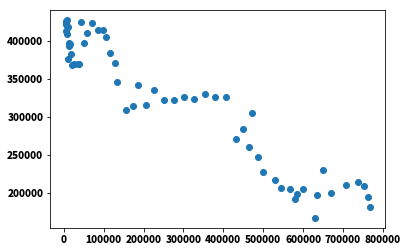

In [4]:
x=gni['平均每人GNI'][8:69].values
y=birth['出生數'].values
plt.scatter(x,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
regr=LinearRegression()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X=x.reshape(len(x),1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [10]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
Y_pred = regr.predict(x_test)

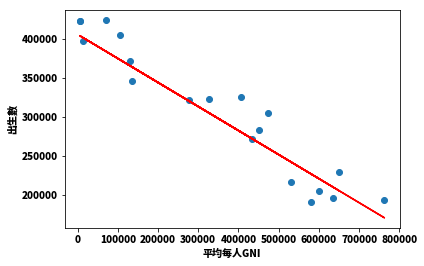

In [12]:
plt.scatter(x_test, y_test)
plt.xlabel("平均每人GNI")
plt.ylabel("出生數")
plt.plot(x_test, Y_pred, 'r')


## 準確率預估

或許因為資料數較少，導致準確率高9成

In [13]:
regr.score(x_test,y_test) 

0.9073391290429725